In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





In [2]:
df =pd.read_csv(r"C:\Users\sridh\Downloads\Attrition data.csv")

In [3]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [4]:
# Assuming 'Attrition' column contains 'Yes' and 'No' values
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [5]:
# Lets find out our dataset's naive attrition rate

print(len(df[df.Attrition==True])/len(df)*100)


16.122448979591837


In [6]:
df.groupby('Gender').Attrition.mean()

Gender
Female    0.153061
Male      0.166667
Name: Attrition, dtype: float64

In [7]:
# Sampling mean with confidence interval --- Defining our function
# a and b define the range of our confidence interval
def conf_sample(data, a, b, func ,size):
    
    replicates = np.empty(size)
    
    for i in range(size):
        
        replicate = np.random.choice(data, len(data))
        
        replicates[i] = func(replicate)          
        
        x,y = np.percentile(replicates, [a,b])
        
    return (x,y)

In [8]:
conf_sample(df['Attrition'], 2.5, 97.5, np.mean, 10000)

(0.15034013605442176, 0.17211451247165524)

Text(45, 0.4, 'Higher Difference')

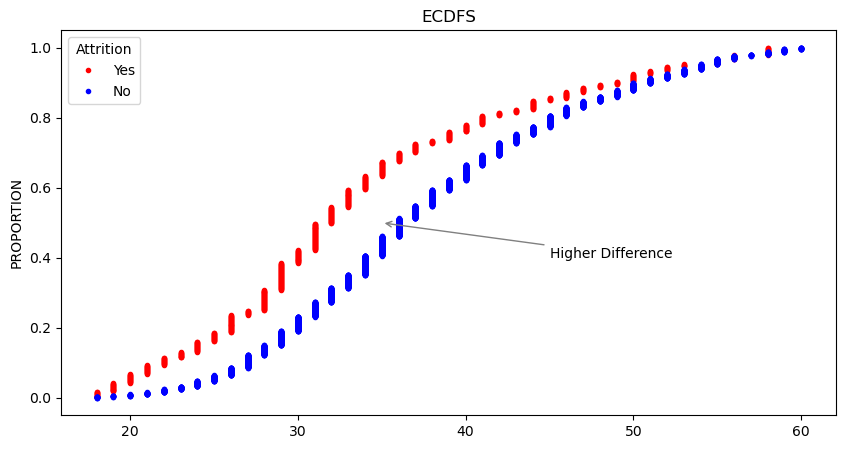

In [11]:
def ecdf(data):
    
    y = (np.arange(1, len(data) + 1))/len(data)
    x = np.sort(data)
    return x,y

# PLotting the ECDFS

x_yes, y_yes = ecdf(df[df['Attrition']==True].Age)
x_no, y_no = ecdf(df[df['Attrition']==False].Age)
plt.figure(figsize=(10,5))
plt.plot(x_yes, y_yes, linestyle = 'none', marker = '.', color = 'r')
plt.plot(x_no, y_no, linestyle = 'none', marker = '.', color = 'b')
plt.ylabel('PROPORTION')
plt.title('ECDFS')
plt.legend(['Yes','No'], title = 'Attrition')

plt.annotate('Higher Difference',
             xy = (35, 0.5),
             xytext = (45, 0.4),
             arrowprops = {'arrowstyle':'->', 'color':'gray'})




In [12]:


# Now, calculate the mean grouped by 'BusinessTravel'
result = df.groupby('BusinessTravel')['Attrition'].mean()
print(result)


BusinessTravel
Non-Travel           0.080000
Travel_Frequently    0.249097
Travel_Rarely        0.149569
Name: Attrition, dtype: float64


In [13]:
df.groupby('Department')['Attrition'].mean()

Department
Human Resources           0.301587
Research & Development    0.157128
Sales                     0.150224
Name: Attrition, dtype: float64

In [20]:
MonthlyRate=df['MonthlyIncome']/12

In [23]:
df['MonthlyRate']=MonthlyRate

In [24]:
df.groupby('EducationField').MonthlyRate.mean()


EducationField
Human Resources     5037.746914
Life Sciences       5442.652640
Marketing           4919.240042
Medical             5591.393678
Other               5480.121951
Technical Degree    5347.638889
Name: MonthlyRate, dtype: float64

In [28]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'MonthlyRate'],
      dtype='object')

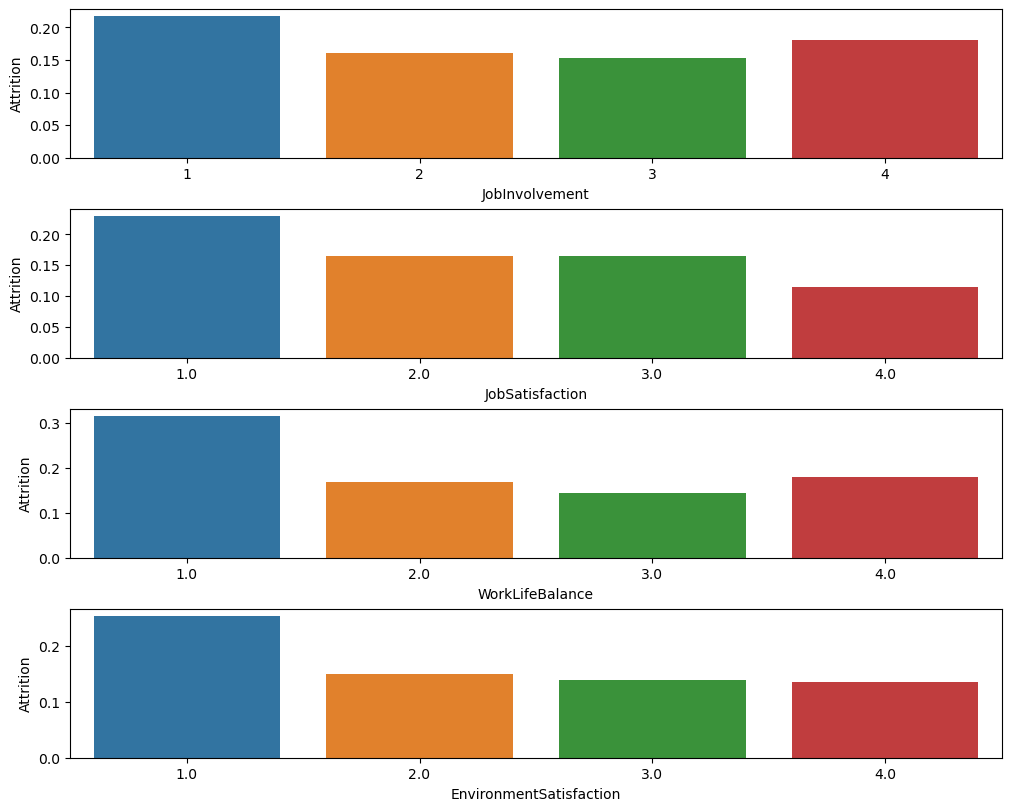

In [29]:
cols = ['JobInvolvement', 'JobSatisfaction',  'WorkLifeBalance', 'EnvironmentSatisfaction']
# Assuming df is your DataFrame
fig, ax = plt.subplots(len(cols), 1, figsize=(10, 8), constrained_layout=True)

for i, col in enumerate(cols):
    sns.barplot(x=col, y='Attrition', data=df, ax=ax[i], ci=None)

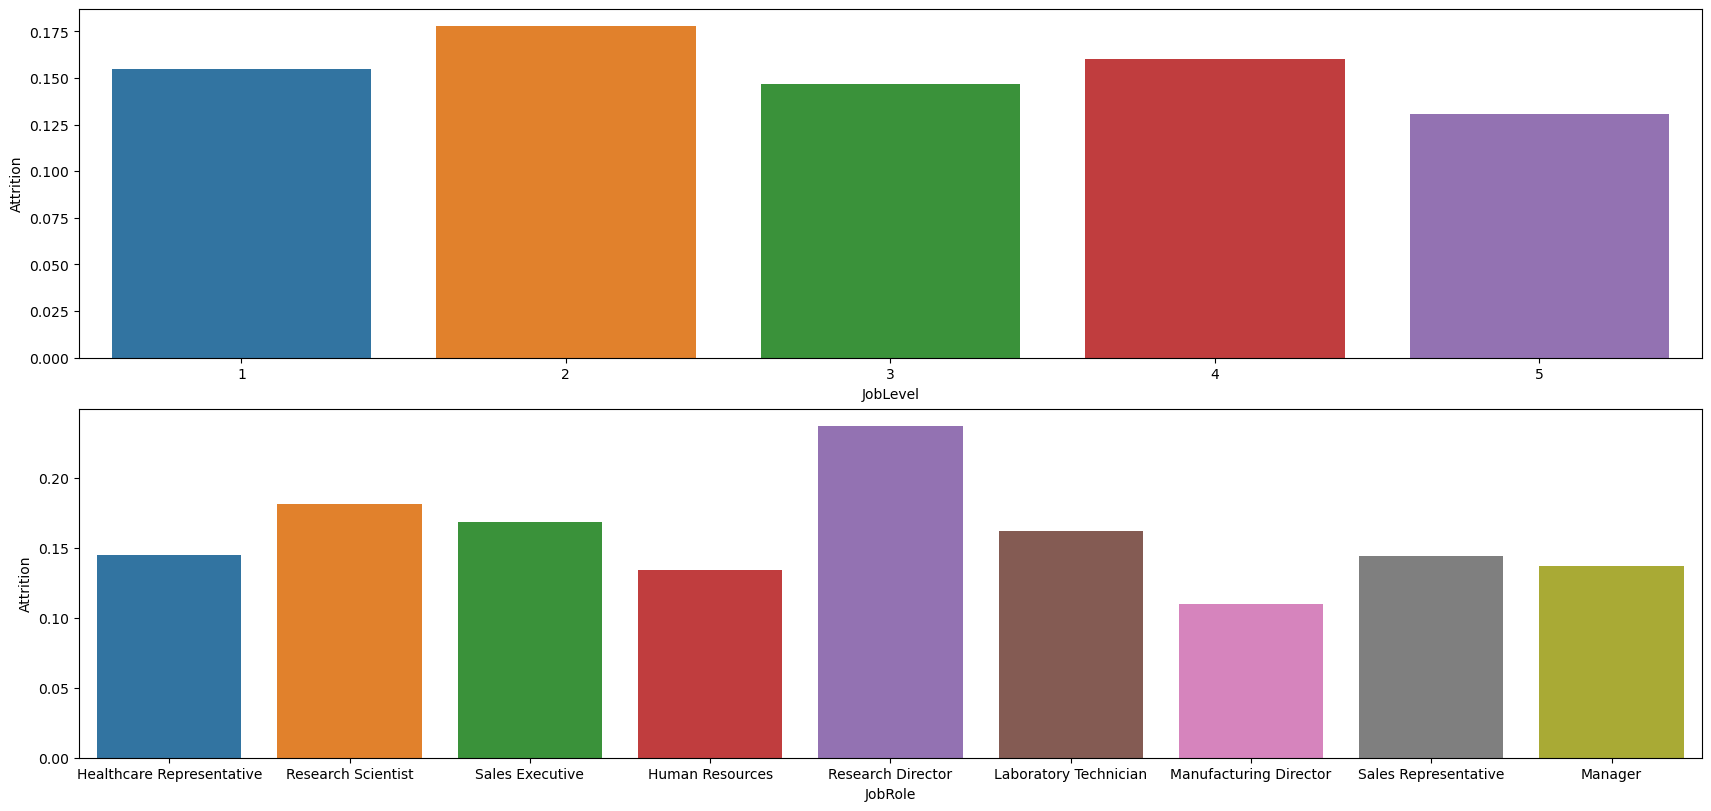

In [34]:
cols = ['JobLevel', 'JobRole']

fig, ax = plt.subplots(len(cols), 1, figsize=(17, 8), constrained_layout=True)

for i, col in enumerate(cols):
    sns.barplot(x=col, y='Attrition', data=df, ax=ax[i], ci=None)

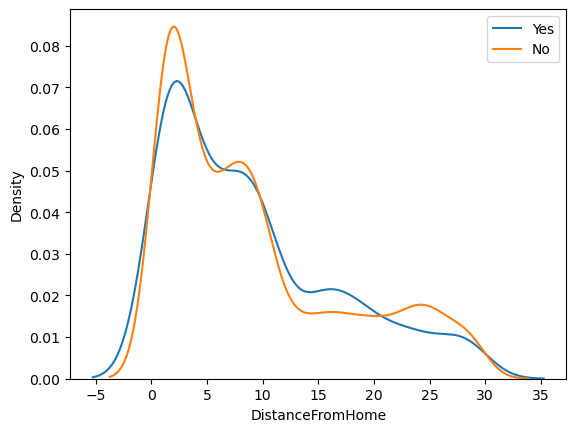

In [35]:
Attrition_Y = df[df['Attrition']==True]
Attrition_N = df[df['Attrition']==False]
sns.kdeplot(Attrition_Y.DistanceFromHome)
sns.kdeplot(Attrition_N.DistanceFromHome)
plt.legend(('Yes', 'No'))

In [36]:
df.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack()

Attrition,0,1
JobRole,,
Healthcare Representative,8.714286,9.052632
Human Resources,8.955556,11.285714
Laboratory Technician,10.322581,9.000000
Manager,7.954545,8.571429
Manufacturing Director,9.379845,7.750000
Research Director,8.786885,9.947368
Research Scientist,8.899582,10.301887
Sales Executive,9.391144,7.090909
Sales Representative,9.014085,11.500000


In [37]:
df[df['DistanceFromHome']>10].groupby('BusinessTravel').Attrition.mean()

BusinessTravel
Non-Travel           0.121951
Travel_Frequently    0.162500
Travel_Rarely        0.160991
Name: Attrition, dtype: float64

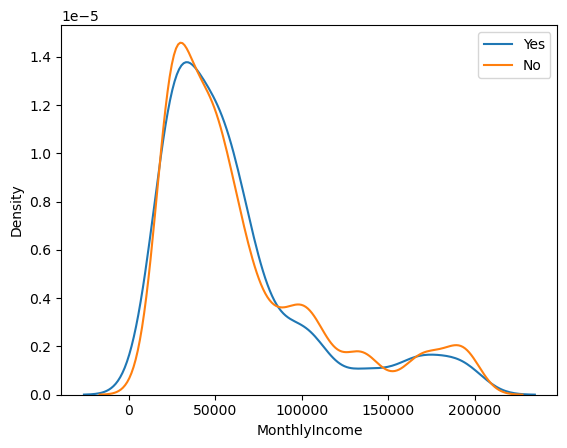

In [38]:
sns.kdeplot(Attrition_Y.MonthlyIncome)
sns.kdeplot(Attrition_N.MonthlyIncome)
plt.legend(('Yes', 'No'))

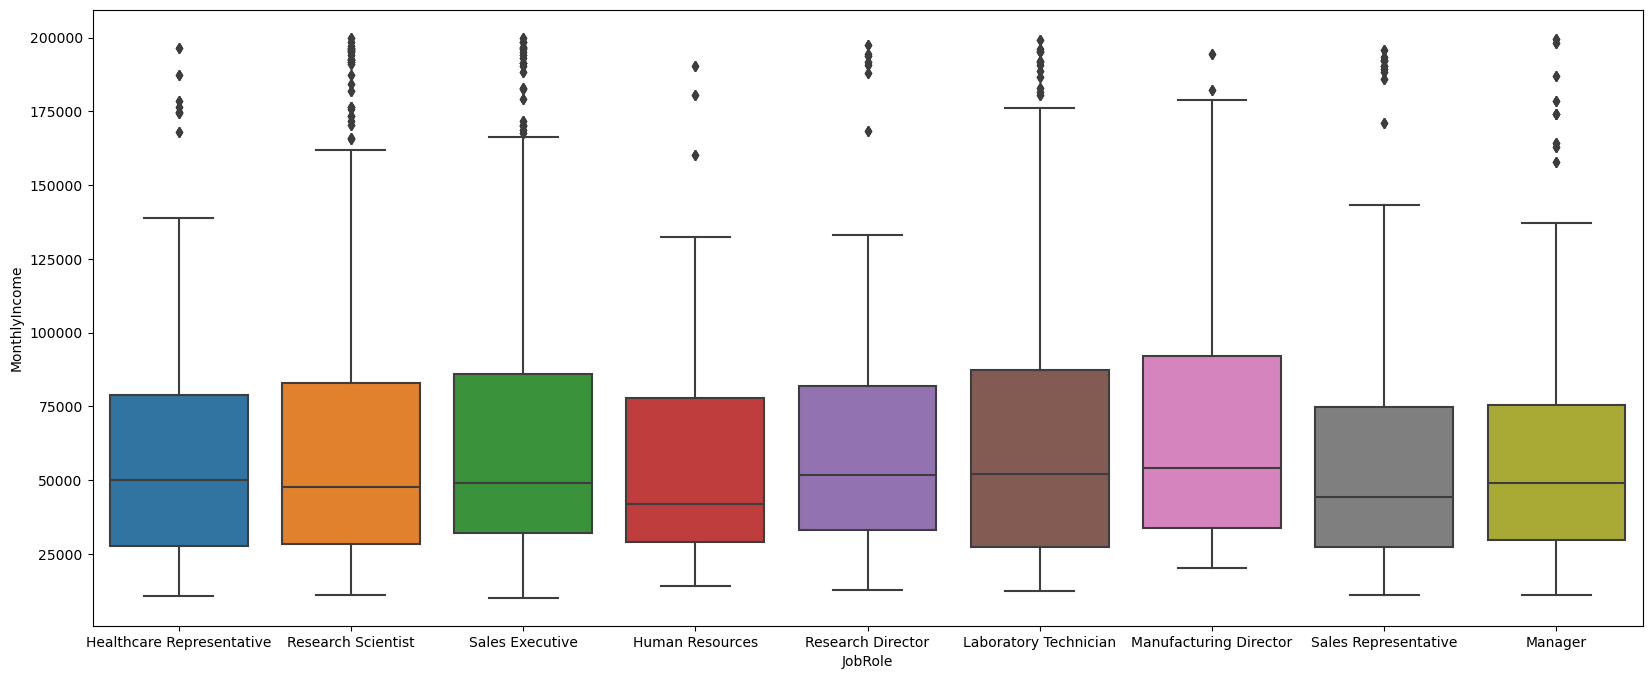

In [40]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=df)
plt.show()

<Axes: xlabel='JobRole', ylabel='MonthlyIncome'>

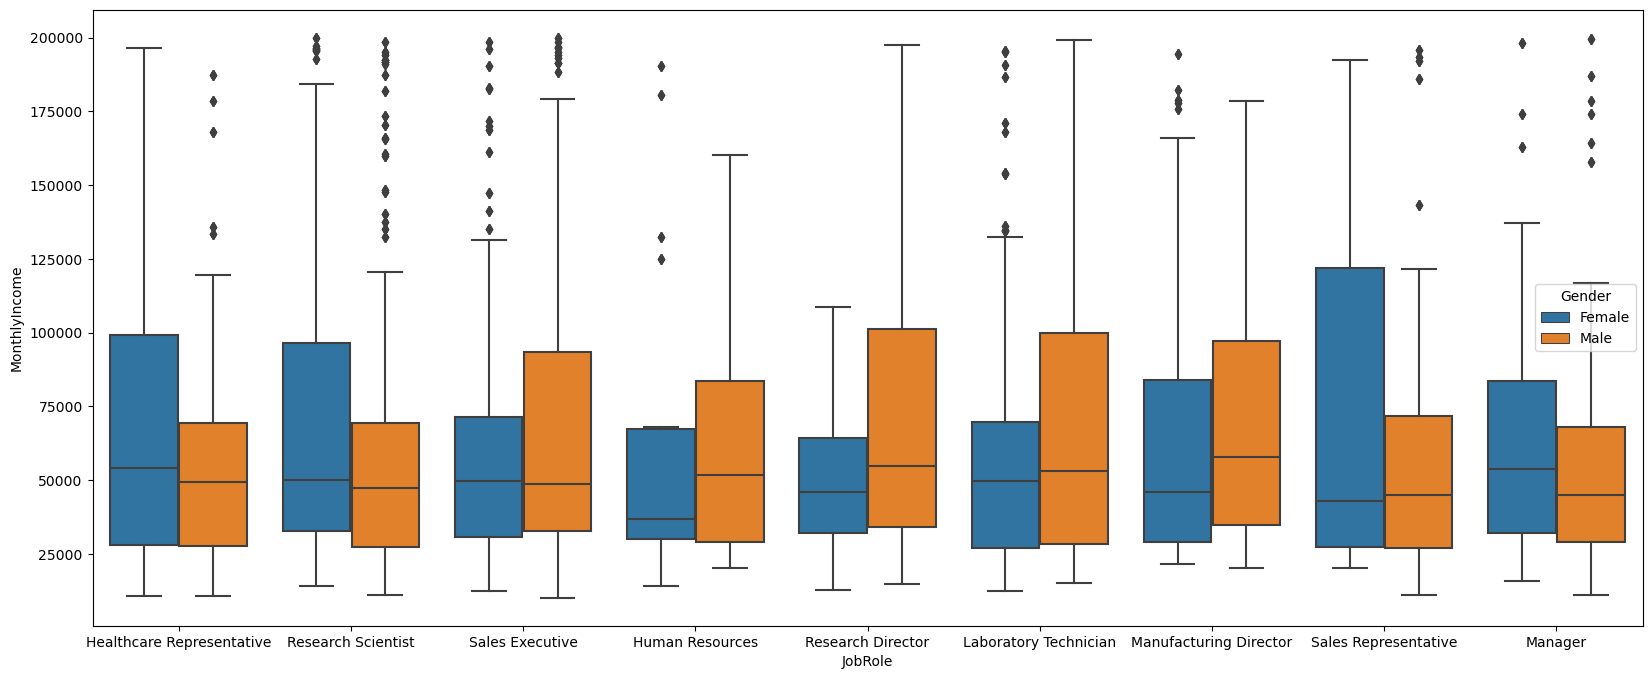

In [43]:
plt.figure(figsize=(20,8))
sns.boxplot(x='JobRole', y='MonthlyIncome', hue = 'Gender',data = df)

<Axes: >

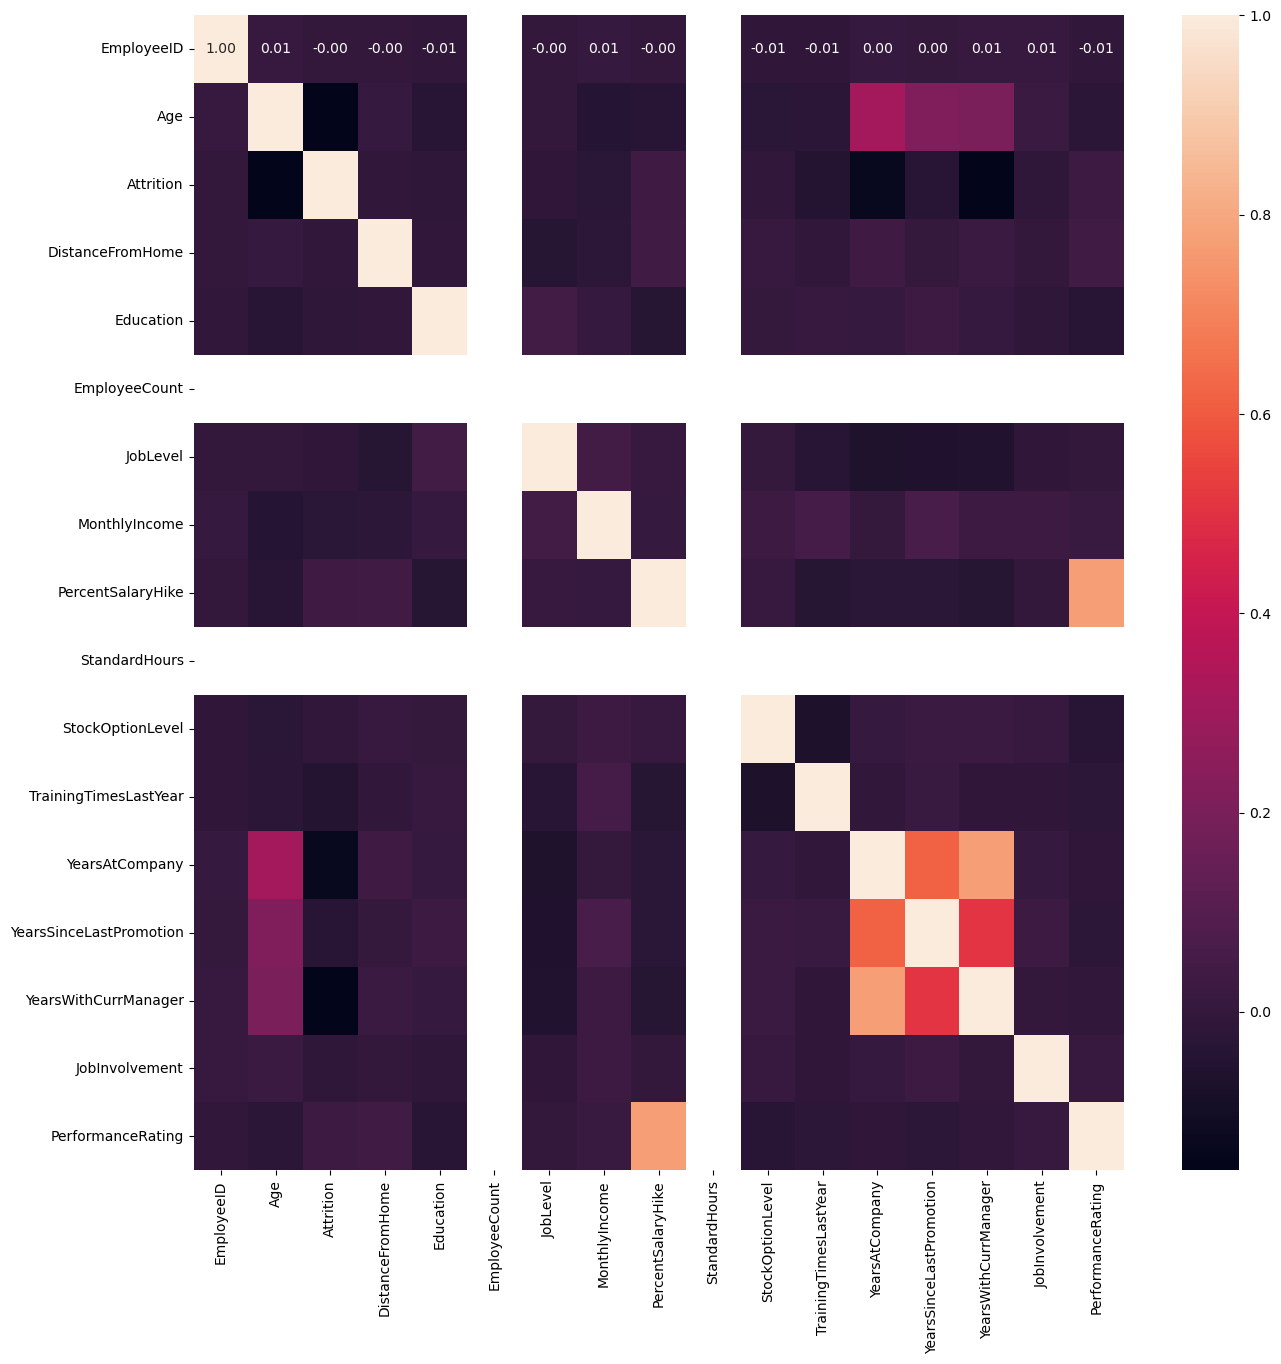

In [44]:
df_c = df.select_dtypes('int64')
plt.figure(figsize=(15,15))
sns.heatmap(df_c.corr(), annot = True, fmt = '.2f')